Dataset: [Current_Paris_Properties_for_rent](https://dagshub.com/Omdena/ParisFranceChapter_HousingAffordabilityAnalysis/src/development/src/data/Current%20Paris%20Properties%20For%20Rent.xlsx)

Performed EDA on a dataset containing information about properties available for rent. The primary goal is to uncover patterns, relationships, and insights that can inform better understanding of the property market. Key features include property size, tax, total rooms, number of bedrooms, number of bathrooms, and property prices.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1) Load data**


In [3]:
fdata = pd.read_excel('/content/drive/My Drive/Current Paris Properties For Rent.xlsx')
fdata.head()

,Proprety_name,Price (dollars),Year_Built,Property_Type,Area (sq ft),Tax (dollars/year),Total_room,Bedroom,Bathroom,Area_code,Price (euros),Prop_size (m^2),Website
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,641304,1875.0,Apartments,430.0,612.0,3.0,1.0,1.0,75018,589999,39,https://www.sothebysrealty.com/eng
1,Renovated flat with open view - Paris 4th - Ma...,635870,1860.0,Apartments,452.0,465.0,2.0,1.0,1.0,75004,585000,41,https://www.sothebysrealty.com/eng
2,Saint-Germain-des-PrÃ©s / rue Cassette,630435,NaN,Apartments,409.0,NaN,NaN,1.0,2.0,75006,580000,37,https://www.sothebysrealty.com/eng
3,Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...,630435,NaN,Apartments,495.0,NaN,2.0,1.0,2.0,75008,580000,45,https://www.sothebysrealty.com/eng
4,Saint-Germain-des-PrÃ©s,608696,1800.0,Apartments,312.0,NaN,NaN,1.0,2.0,75006,560000,28,https://www.sothebysrealty.com/eng


I only worked with the price in euros and the prop_size in m^2 to ensure synchronisation with other analysis performed on other datasets

In [4]:
# Dropping the unnecessary attributes
data = fdata.drop(['Price (dollars)','Area_code', 'Website', 'Area (sq ft)'], axis=1)
data.head()

,Proprety_name,Year_Built,Property_Type,Tax (dollars/year),Total_room,Bedroom,Bathroom,Price (euros),Prop_size (m^2)
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,1875.0,Apartments,612.0,3.0,1.0,1.0,589999,39
1,Renovated flat with open view - Paris 4th - Ma...,1860.0,Apartments,465.0,2.0,1.0,1.0,585000,41
2,Saint-Germain-des-PrÃ©s / rue Cassette,NaN,Apartments,NaN,NaN,1.0,2.0,580000,37
3,Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...,NaN,Apartments,NaN,2.0,1.0,2.0,580000,45
4,Saint-Germain-des-PrÃ©s,1800.0,Apartments,NaN,NaN,1.0,2.0,560000,28


# **2) Data Pre-Processing**

**1-- Ensuring the unique values in Property Type**

In [5]:
# Check unique values in the Property Type column
unique_values = data['Property_Type'].unique()
print(unique_values)


['Apartments' 'Single Family Homes' 'Duplex Homes' 'Townhouse' 'Land'
 'apartment' 'villa/townhouse' 'commercial / office']


In [6]:
# Standardize property type names
data['Property_Type'] = data['Property_Type'].replace({
    'Apartments': 'apartment'
})

In [7]:
# Verify the changes
print(data['Property_Type'].unique())

['apartment' 'Single Family Homes' 'Duplex Homes' 'Townhouse' 'Land'
 'villa/townhouse' 'commercial / office']


**2-- Deleting Illogical Values**

We will delete the rows where the "Year_Built" is greater than the current year

In [8]:
# Get the current year
current_year = datetime.now().year
print(f"Current Year: {current_year}")

# Filter the DataFrame to exclude rows where 'Year Built' > current_year
data = data[data['Year_Built'] <= current_year]

Current Year: 2024


**3-- Converting Columns to Appropriate Types**

We convert the Price(euros) columns to numeric types after removing any non-numeric characters.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 841
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       644 non-null    object 
 1   Year_Built          644 non-null    float64
 2   Property_Type       644 non-null    object 
 3   Tax (dollars/year)  147 non-null    float64
 4   Total_room          160 non-null    float64
 5   Bedroom             634 non-null    float64
 6   Bathroom            632 non-null    float64
 7   Price (euros)       643 non-null    object 
 8   Prop_size (m^2)     644 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 50.3+ KB


In [10]:
data['Price (euros)'] = pd.to_numeric(data['Price (euros)'], errors='coerce')


**4-- Missing Values**

In [11]:
missing_values = data.isnull().sum()
missing_values

Proprety_name           0
Year_Built              0
Property_Type           0
Tax (dollars/year)    497
Total_room            484
Bedroom                10
Bathroom               12
Price (euros)           1
Prop_size (m^2)         0
dtype: int64

**Handling Missing Values**


*   Year_Built: Removed the rows where Year_Built is Null
*   Price(euros), tax, Total room, Bedroom, Bathroom: used *the mean*




In [12]:
data.dropna(subset=['Year_Built'], inplace=True)

data['Tax (dollars/year)'].fillna(data['Tax (dollars/year)'].mean(), inplace=True)
data['Total_room'].fillna(data['Total_room'].mean(), inplace=True)
data['Bedroom'].fillna(data['Bedroom'].mean(), inplace=True)
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Price (euros)'].fillna(data['Price (euros)'].mean(), inplace=True)

In [13]:
missing_values_updated = data.isnull().sum()
missing_values_updated

Proprety_name         0
Year_Built            0
Property_Type         0
Tax (dollars/year)    0
Total_room            0
Bedroom               0
Bathroom              0
Price (euros)         0
Prop_size (m^2)       0
dtype: int64

Converting the data to float:
the data is first rounded to the nearest integer then converted to float

In [14]:
# Convert data types
data['Tax (dollars/year)'] = data['Tax (dollars/year)'].round().astype(float)
data['Total_room'] = data['Total_room'].round().astype(float)
data['Bedroom'] = data['Bedroom'].round().astype(float)
data['Bathroom'] = data['Bathroom'].round().astype(float)
data['Price (euros)'] = data['Price (euros)'].round().astype(float)

# Verifying the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 841
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       644 non-null    object 
 1   Year_Built          644 non-null    float64
 2   Property_Type       644 non-null    object 
 3   Tax (dollars/year)  644 non-null    float64
 4   Total_room          644 non-null    float64
 5   Bedroom             644 non-null    float64
 6   Bathroom            644 non-null    float64
 7   Price (euros)       644 non-null    float64
 8   Prop_size (m^2)     644 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 50.3+ KB


# **3) Summary Statistics**

In [15]:
numerical_features = data.columns[data.dtypes != 'object']
# categorical feature = data['the Property_Type']

#### **1. Categorical Variable**

**Description of Categorical Variables**


The only categorical feature that exists is the **Property_Type**

In [16]:
# Description of Categorical variables
data['Property_Type'].describe()

count           644
unique            6
top       apartment
freq            608
Name: Property_Type, dtype: object

**Visualization of Categorical Variables (pie)**

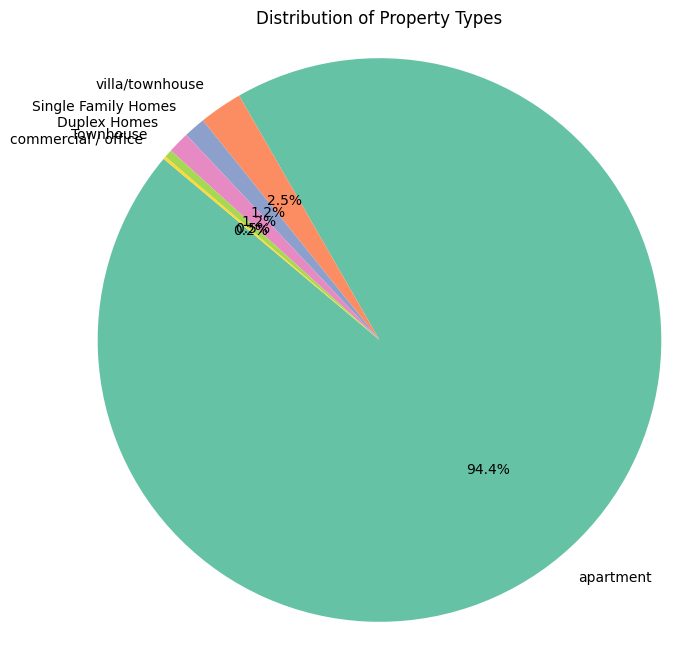

In [17]:
# Count the occurrences of each property type
property_counts = data['Property_Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

Observations:
Most of the available properties available for rent are apartments

#### **2. Numerical Variables**

**Description of Numerical Variable**

In [18]:
# Description of Numerical variables
data[numerical_features].describe()

,Year_Built,Tax (dollars/year),Total_room,Bedroom,Bathroom,Price (euros),Prop_size (m^2)
count,644.000000,644.000000,644.000000,644.000000,644.000000,6.440000e+02,644.000000
mean,1896.114907,2601.108696,4.927019,2.683230,2.195652,2.582908e+06,140.717391
std,71.409466,784.593967,1.014337,1.340469,1.453985,2.262945e+06,86.205048
min,1436.000000,434.000000,1.000000,1.000000,0.000000,0.000000e+00,21.000000
25%,1880.000000,2601.000000,5.000000,2.000000,1.000000,1.150000e+06,76.750000
50%,1900.000000,2601.000000,5.000000,3.000000,2.000000,1.877499e+06,119.500000
75%,1935.000000,2601.000000,5.000000,3.000000,3.000000,3.122499e+06,178.250000
max,2021.000000,7717.000000,10.000000,15.000000,9.000000,1.510000e+07,543.000000


The dataset comprises 644 properties with construction years spanning from **1436 to 2021**, averaging around 1896.
The properties have an average of **5 rooms**, including **3 bedrooms** and **2 bathrooms**.

Annual property **taxes average $2,601**, with most properties having taxes at this exact amount, indicating a **common tax bracket**.

Property prices show significant variation, with a mean value of approximately €2.58 million, and property sizes averaging 140.72 square meters.



**Box Plots for Numerical Columns**

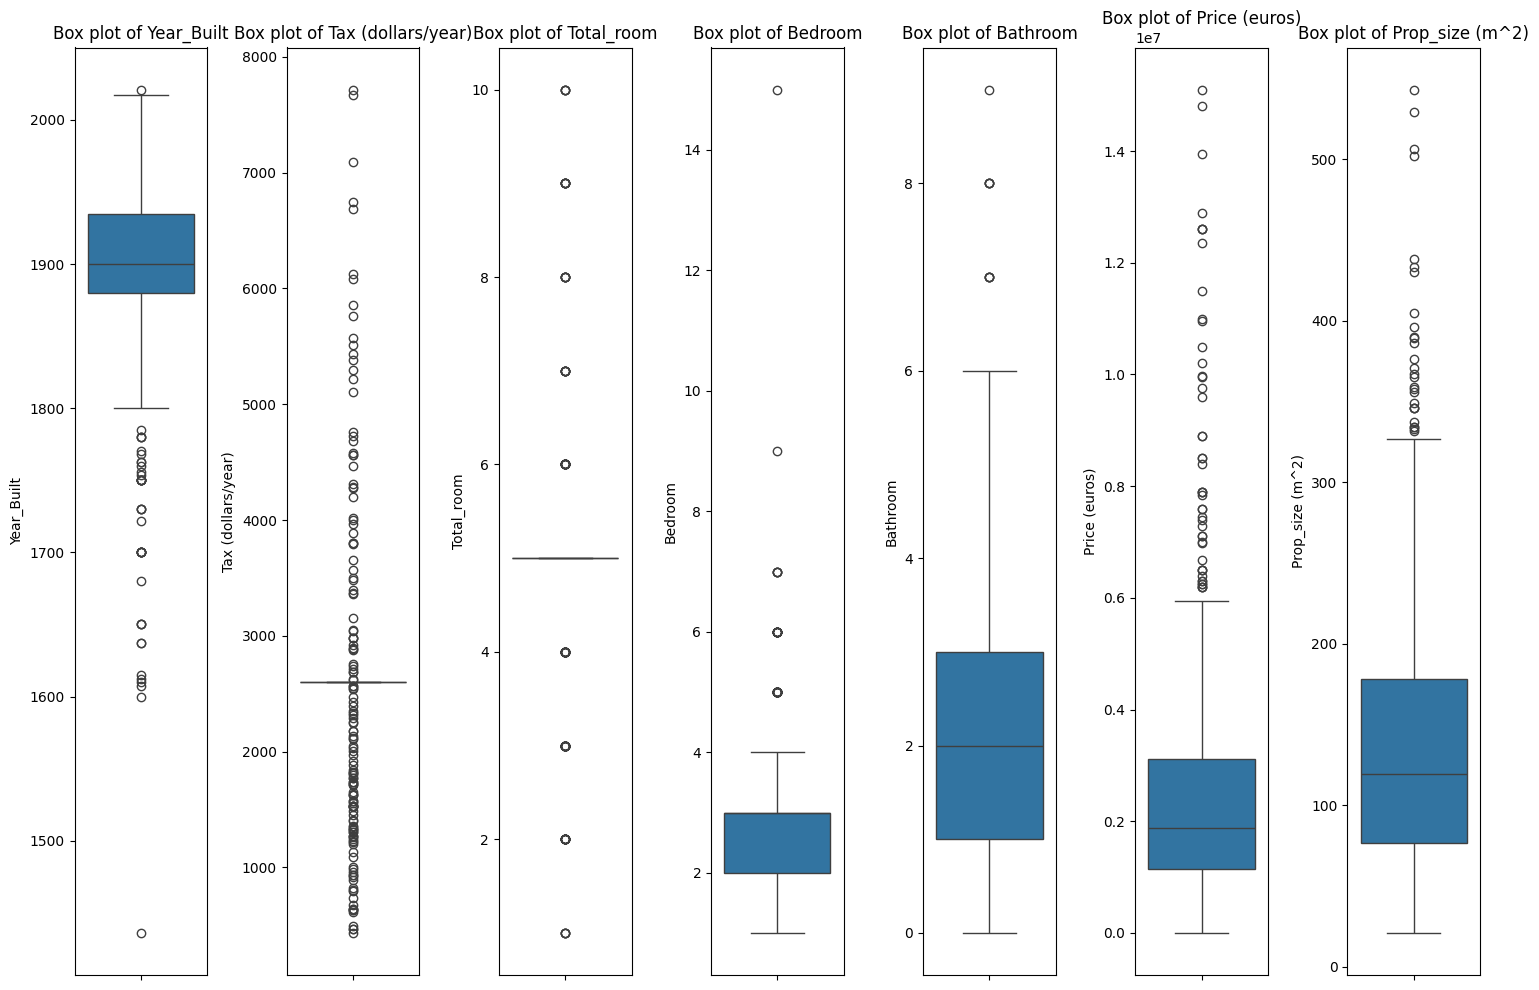

In [19]:
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(1,len(numerical_features),i+1)
  sns.boxplot(y=data[feature])
  plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


**Histogram for Numerical features**

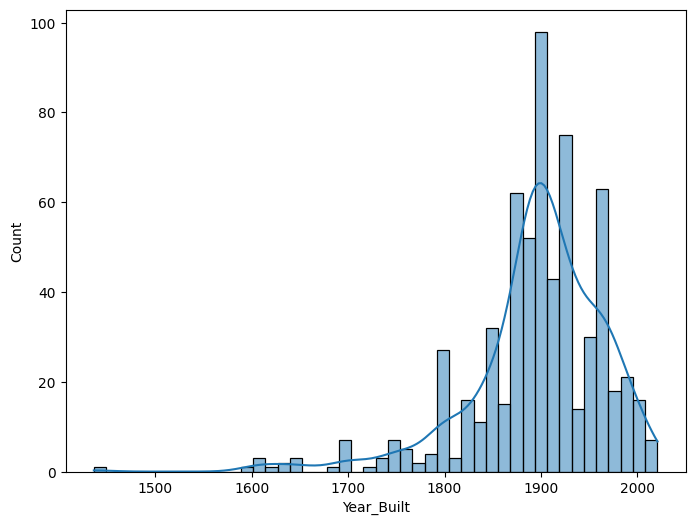

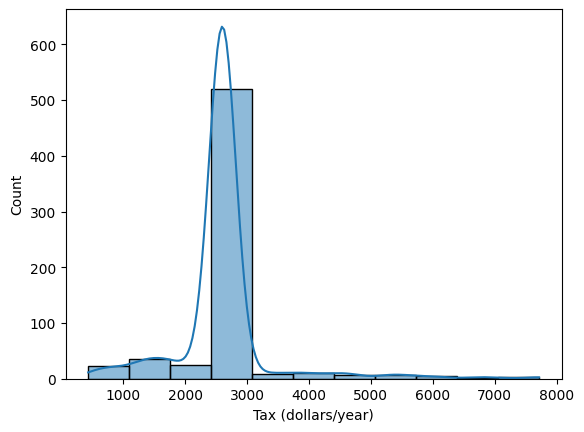

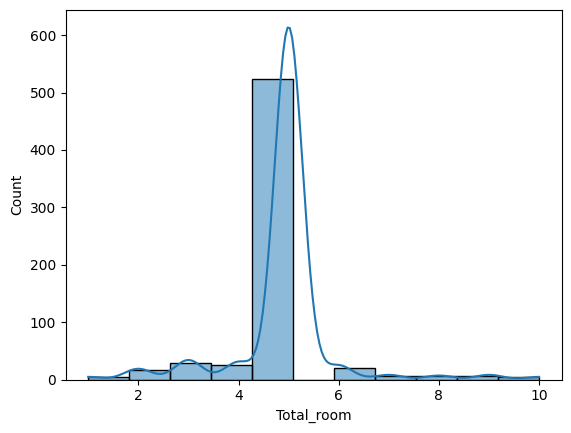

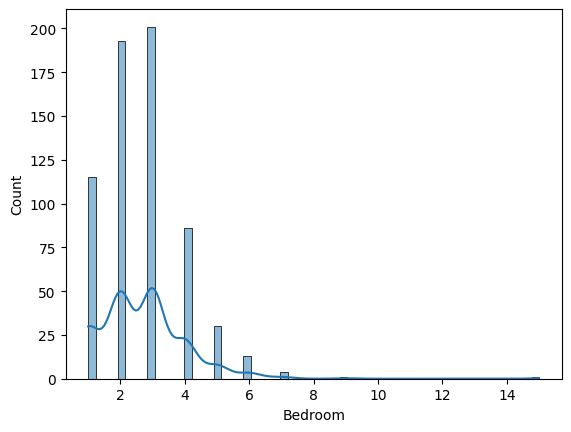

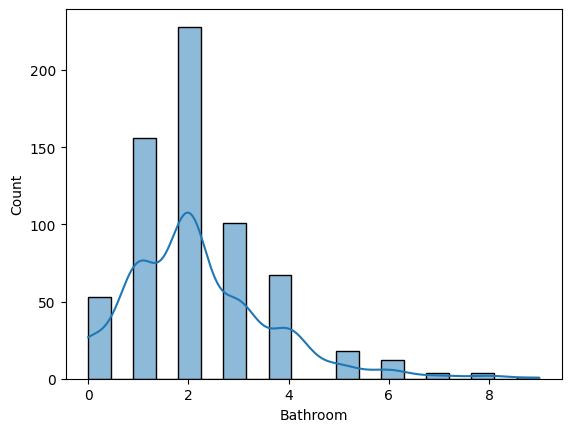

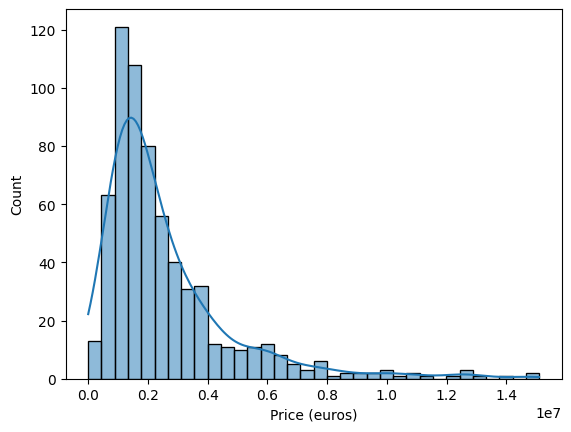

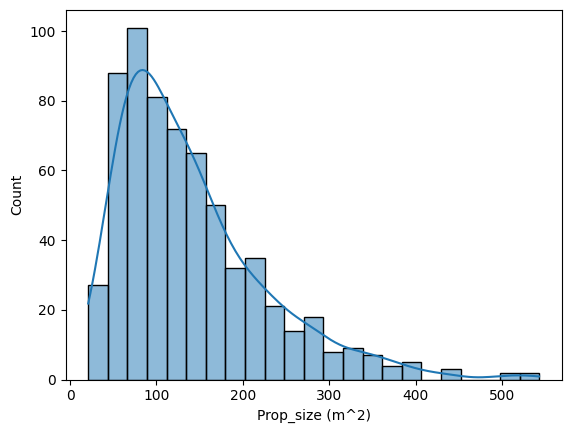

In [20]:
plt.figure(figsize=(8,6))
x = 0
for i in numerical_features:
    sns.histplot(data= data, x=i , kde =True)
    print('\n')
    plt.show()

Most of the available properties are of size of approximately 100 m^2, with on avergae 2 to 3 bedrooms and 2 bathrooms.
Most of the properties are with 5 rooms in total.


#### **3. Correlation Matrix**

**Label Encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical column
data['Property_Type_Encoded'] = encoder.fit_transform(data['Property_Type'])

# # Display the transformed data
# print(data)

In [22]:
data.head()

,Proprety_name,Year_Built,Property_Type,Tax (dollars/year),Total_room,Bedroom,Bathroom,Price (euros),Prop_size (m^2),Property_Type_Encoded
0,Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...,1875.0,apartment,612.0,3.0,1.0,1.0,589999.0,39,3
1,Renovated flat with open view - Paris 4th - Ma...,1860.0,apartment,465.0,2.0,1.0,1.0,585000.0,41,3
4,Saint-Germain-des-PrÃ©s,1800.0,apartment,2601.0,5.0,1.0,2.0,560000.0,28,3
5,Saint-Germain-des-PrÃ©s,1800.0,apartment,641.0,5.0,1.0,2.0,560000.0,28,3
6,"PARIS 17, MONCEAU PARK",1900.0,apartment,2601.0,5.0,1.0,2.0,549999.0,43,3


**Correlation Matrix**

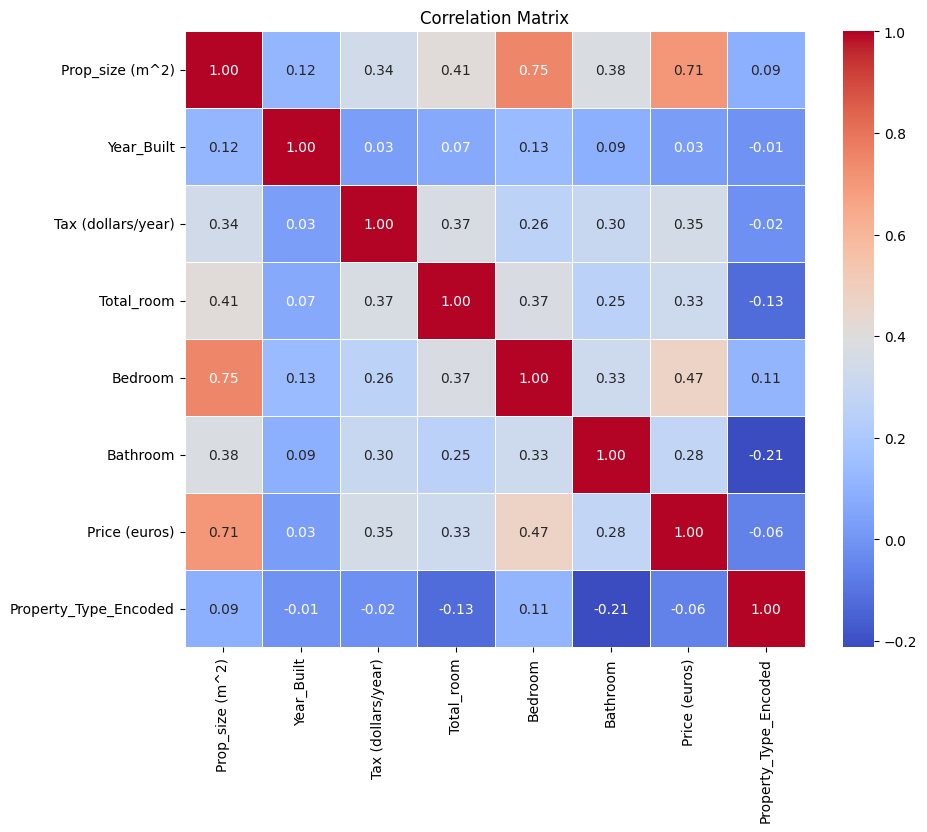

In [23]:
# Select columns for correlation matrix
columns_of_interest = ['Prop_size (m^2)', 'Year_Built', 'Tax (dollars/year)',
                       'Total_room', 'Bedroom', 'Bathroom', 'Price (euros)', 'Property_Type_Encoded']
data_corr = data[columns_of_interest]

# Compute correlation matrix
corr_matrix = data_corr.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**Strong Correlation:** Prop_size and bedroom; Prop_size and Price (euros)

**Moderate Correlation:** Prop_size and total_room; Prop_size and bathroom; Bedroom and Price; Tax and Prop_size; Tax and Price;

**Weak Correlation:** Year_built and the rest of the attributes;